<a href="https://colab.research.google.com/github/jjain0811/Comprehensive-Survey-on-Techniques-of-Topic-Evolution-Mining/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/Research Project 20-21/Datasets/User wise data SSR /userwise')

In [ ]:
import os
os.chdir("/content/drive/My Drive/Research Project 20-21/DATA")

In [ ]:
import json
f=open('filtered_data.json')
da = json.load(f)

In [ ]:
import json
ht = "sssr_"
with open(ht+'_ht.json', 'r') as handle:
  da = json.load(handle)

In [ ]:
da.keys()

dict_keys(['17937017', '1279761369206833152', '1205214154761490437', '2532878335', '4010867506', '1196533666530201601', '460994817', '1278331794434084871', '731774530574819328', '1270960757904035845', '1237528185807360001', '4352044939', '719945467178655745', '1282646577941819392'])

In [ ]:
da['2532878335']

{'created_at': '2014-05-29 15:31:23',
 'description': 'My name is Sourav and I am not a Bot. Not giving up until justice is served to real Hero Sushant Singh Rajput. Proud Indian🇮🇳',
 'entities': {'description': {'urls': []}},
 'favourites_count': 5678,
 'followers_count': 421,
 'following': False,
 'friends_count': 648,
 'lang': None,
 'name': 'SOURAV ✌️Justice 4 SSR✌️',
 'retweets': [{'created_at': '2020-10-17 13:30:48',
   'entities': {'hashtags': [{'indices': [123, 127], 'text': 'SSR'}],
    'symbols': [],
    'urls': [],
    'user_mentions': [{'id': 1308443773303619584,
      'id_str': '1308443773303619584',
      'indices': [3, 18],
      'name': 'AWN NEWS UAE',
      'screen_name': 'AmalWorldNews1'}]},
   'text': 'RT @AmalWorldNews1: Big Expose : AWN NEWS Finds A Deep Link to Dawood Group With Bollywood Superstars &amp; Moha Govt. How #SSR  Demise Tried T…'},
  {'created_at': '2020-10-17 13:30:11',
   'entities': {'hashtags': [{'indices': [105, 122],
      'text': 'KolkataChalo4

In [ ]:
da['User_rofflekris.json'].keys()

dict_keys(['name', 'desc', 'followers', 'friends', 'created_at', 'favourites_count', 'location', 'verified', 'tweets', 'retweets'])

In [ ]:
!pip install chart-studio



     |████████████████████████████████| 71kB 2.0MB/s 


In [ ]:
import tweepy
import re
# import commands
import os
import datetime
import json
import string
import operator
import nltk
import pandas as pd
from dateutil.relativedelta import *
from dateutil.easter import *
from dateutil.rrule import *
from dateutil.parser import *
from datetime import *
from dateutil import parser
import collections
from collections import Counter
from math import ceil
from textblob import TextBlob
from collections import Counter
from textblob.np_extractors import ConllExtractor
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
cf.go_offline()




class UserAnalytics():

    """ Analysing user and getting some user statistics  """

    def __init__(self, user_dict):

        """ Initial funtion to get profile_screen_name details """
        # self.hashtag=hashtag
        self.user_dict = user_dict
        # self.now =  parse(commands.getoutput("date"))
        # self.today =  self.get_datetime(self.now.ctime())
    def user_latest_tweets(self):

        """ Function to get user latest tweets """
        recent_tweets_list=[]
        time_line = self.user_dict["tweets"]

        tweet_counter = 0
        for single_tweet in time_line:
            # print(single_tweet) single_tweet["text"][0] != '@' and
            if (single_tweet["text"][:2] != 'RT'):
                recent_tweets_list.append(single_tweet['text'])

        return recent_tweets_list

    def user_latest_tweets_on_ht(self, hashtag):

        """ Function to get user latest tweets """
        recent_tweets_list=[]
        time_line = self.user_dict["tweets"]

        tweet_counter = 0
        for single_tweet in time_line:
            # print(single_tweet) single_tweet["text"][0] != '@' and
            if (single_tweet["text"][:2] != 'RT'):
                for ht in single_tweet['entities']['hashtags']:
                    if ht['text'].lower() == hashtag.lower():
                        recent_tweets_list.append(single_tweet['text'])

        return recent_tweets_list
    def avg_tweets_month(self):

        """ Returns the average tweets per month """
        # print("Jainam choti luli")
        tweets_and_dates_dict = {}
        time_line = [self.user_dict["tweets"]]
        for single_tweet in time_line:

            tweets_and_dates_dict[self.get_datetime(single_tweet['created_at'])] = self.tweet_purely(single_tweet['text'])
        od = collections.OrderedDict(sorted(tweets_and_dates_dict.items()))
        datetime_list = list(od.keys())
        print(datetime_list)
        datetime_list.reverse()
        result = self.time_difference_seconds(datetime_list[0],datetime_list[-1]) / (len(datetime_list)-1)

        return result,datetime_list
    def avg_tweets_month_on_ht(self, hashtag):

        """ Returns the average tweets per month """
        # print("Jainam choti luli")
        tweets_and_dates_dict = {}
        time_line = self.user_dict["tweets"]
        for single_tweet in time_line:
            # print(single_tweet)

            for ht in single_tweet['entities']['hashtags']:
                if ht['text'].lower() == hashtag.lower():
                    tweets_and_dates_dict[self.get_datetime(single_tweet['created_at'])] = self.tweet_purely(single_tweet['text'])
        od = collections.OrderedDict(sorted(tweets_and_dates_dict.items()))
        datetime_list = list(od.keys())
        print(datetime_list)
        datetime_list.reverse()
        result = self.time_difference_seconds(datetime_list[0],datetime_list[-1]) / (len(datetime_list)-1)

        return result,datetime_list

    def get_datetime(self,date):

        """ Returns date from string """

        self.date = date

        result = parser.parse(self.date,dayfirst=True)

        return result

    def user_followers_following_statistics(self):

        """ Function to analysis user follower and following data to get some statistics """
        # print("Jainam choti luli")

        statistics_dict = {}
        statistics_dict['user_friends_count'] = self.user_dict["friends_count"]
        statistics_dict['following_count'] = self.user_dict["following"]
        statistics_dict['user_followers_count'] = self.user_dict["followers_count"]
        # statistics_dict['created_date'] = self.user_dict["created_at"]
        # datetime_data = self.get_months(self.user_dict["created_at"])
        # statistics_dict['number_of_seconds'] = datetime_data['seconds']
        # statistics_dict['number_of_monts'] = datetime_data['months']

        return statistics_dict

    def get_months(self,user_created_date):

        """ Function to return number of months passed after user created twitter account """

        self.user_created_date = user_created_date

        datetime = {}
        # print("Jainam choti luli")
        result = relativedelta(self.today,self.user_created_date)
        total_days = (result.years * 365) + (result.months * 30) + result.days
        total_seconds = (result.years*31556926)+(result.months*2629744)+(result.days*86400)+(result.hours*3600)+(result.minutes*60)+(result.seconds)
        datetime['seconds'] = total_seconds
        datetime['months'] = total_days /30

        return datetime

    def tweet_purely (self,tweet_text):

        """ Function to pure tweet text """

        # self.tweet_text = tweet_text

        # s = unicode(self.tweet_text).encode('ascii','ignore')
        # print("Jainam choti luli")
        # return s.encode("utf-8")?\
        return tweet_text

    def seconds_ymwdhms(self,seconds,granularity = 5):

        """ return years, months, weeks, days, hours, min, sec from seconds """

        self.seconds = seconds
        self.granularity = granularity

        result = []
        intervals = (
            ('years',31556926), # 60 *  60 * 24 * 30 * 12
            ('months',2629744), # 60 *  60 * 24 * 30
            ('weeks', 604800),  # 60 * 60 * 24 * 7
            ('days', 86400),    # 60 * 60 * 24
            ('hours', 3600),    # 60 * 60
            ('minutes', 60),
            ('seconds', 1),
            )
        for name, count in intervals:
            value = self.seconds // count
            if value:
                self.seconds -= value * count
                if value == 1:
                    name = name.rstrip('s')
                result.append("{} {}".format(value, name))

        return ', '.join(result[:self.granularity])

    def time_difference_seconds(self, first_datetime, second_datetime):

        """  return the difference between two times in seconds """

        self.first_datetime = first_datetime
        self.second_datetime = second_datetime

        result = relativedelta(self.first_datetime,self.second_datetime)
        total_days = (result.years * 365) + (result.months * 30) + result.days
        total_seconds = (result.years*31556926)+(result.months*2629744)+(result.days*86400)+(result.hours*3600)+(result.minutes*60)+(result.seconds)

        return total_seconds

    def convert_datetime_format(self,datetime):

        """ Converts datetime to specific format """
        # print("Jainam choti luli")
        self.datetime = datetime

        d = datetime.strptime(str(self.datetime), '%Y-%m-%d %H:%M:%S')

        return d.strftime('%Y %b %d %H:%M:%S')

    def expected_next_tweet(self,last_tweet_datetime,avg_tweets_seconds):

        """ returns user expected next tweet datetime """

        self.last_tweet_datetime = last_tweet_datetime
        self.avg_tweets_seconds = avg_tweets_seconds
        print("in it",avg_tweets_seconds)
        next_tweet_time =  last_tweet_datetime + timedelta(seconds= avg_tweets_seconds)

        return self.convert_datetime_format(next_tweet_time)

    def favorite_week(self, tweets_datetime_list):

        """ Returns user favorite week """
        # print("Jainam choti luli")
        self.tweets_datetime_list = tweets_datetime_list

        weekdays_list = []
        for single_datetime in self.tweets_datetime_list:
            weekdays_list.append(self.datetime_weekday(single_datetime))
        weeks_count = Counter(weekdays_list)
        weekdays_count_dict = {}
        for key, value in zip(weeks_count.keys(),weeks_count.values()):
            weekdays_count_dict[key] = value

        return sorted([(value,key) for (key,value) in weekdays_count_dict.items()])[-1][1],weekdays_count_dict

    def datetime_weekday(self,datetime):

        """ Returns weekday for a given datetime """

        self.datetime = datetime

        return datetime.strptime(str(self.datetime),'%Y-%m-%d %H:%M:%S').strftime('%A')

    def tweet_sentiment_score(self,tweet):
        # print("Jainam choti luli")

        """ Returns single tweet sentiment score """

        self.tweet = tweet

        Blob_review = TextBlob(self.tweet)
        sentiment_value = Blob_review.sentiment
        sentiment_polarity_value = sentiment_value.polarity
        sentiment_value= ceil(sentiment_polarity_value*1000)/1000.0

        return sentiment_value

    def tweet_cleanup(self,tweet):

        """ Function to remove website links, special characters and twitter users names in Tweets """

        self.tweet = tweet
        # print("Jainam choti luli")


        URLless_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', self.tweet)
        twitteruser_remove_string = re.sub(r'@[A-Za-z0-9_]+', '', URLless_string)
        chars = re.escape(string.punctuation)
        pure_tweet = re.sub(r'['+chars+']', '',twitteruser_remove_string)
        final_string = ((pure_tweet.rstrip()).strip()).lower()

        return final_string

    def tweets_sentiment_score(self, tweets_list):

        """ Returns tweets sentiment score and percentage of positive tweets , negative tweets , neutral tweets """

        self.tweets_list = tweets_list


        sentiment_score_list = []
        for tweet in self.tweets_list:
            sentiment_score_list.append(self.tweet_sentiment_score(self.tweet_cleanup(tweet)))

        return sentiment_score_list

    def sentiment_percentage(self, sentiment_score_list):

        """ Returns sentiment percentage like percentage of Positive tweets , Negative tweets and Neutral tweets """
        try:
            self.sentiment_score_list = sentiment_score_list
            self.lenght_score_list = len(sentiment_score_list)

            pos_count =  sum(x > 0 for x in self.sentiment_score_list)
            neg_count = sum(x <  0 for x in self.sentiment_score_list)
            zero_count = self.sentiment_score_list.count(0)
            total_sentiment = sum([x for x in self.sentiment_score_list])
            effective_count = self.lenght_score_list - zero_count
            sentiment_results = {}
            sentiment_results['sentiment_positiveness'] = (ceil((pos_count / float(self.lenght_score_list)* 100 )*100)/100.0)
            sentiment_results['sentiment_negativeness'] = (ceil((neg_count / float(self.lenght_score_list)* 100 )*100)/100.0)
            sentiment_results['sentiment_neutralness'] = (ceil((zero_count / float(self.lenght_score_list)* 100 )*100)/100.0)
            sentiment_results['overall_sentiment'] = (ceil((total_sentiment / float(effective_count)* 100 )*100)/100.0)

            return sentiment_results
        except Exception as e:
            sentiment_results = {}
            sentiment_results['sentiment_positiveness'] = 0
            sentiment_results['sentiment_negativeness'] = 0
            sentiment_results['sentiment_neutralness'] = 0
            sentiment_results['overall_sentiment'] = 0
            return sentiment_results


    def frequently_used_words(self,tweets_list):


        """ Returns most frequently used words from all tweets for user """

        self.tweets_list = tweets_list

        total_words_list = []
        words_frequence_dict = {}
        for single_tweet in self.tweets_list:
            clean_tweet = self.tweet_cleanup(single_tweet)
            for single_word in clean_tweet.split():
                if len(single_word) >2 and self.find_IN_partsofspeech(single_word):
                    total_words_list.append(single_word)
        word_counts = Counter(total_words_list)
        for key,value in zip(list(word_counts.keys())[0:],list(word_counts.values())[0:]):
            words_frequence_dict[key] = value
        sorted_dict = sorted(words_frequence_dict.items(), key=operator.itemgetter(1))
        sorted_dict.reverse()

        return sorted_dict[:5],total_words_list

    def find_IN_partsofspeech(self,word):

        """ Function to find the give word partsofspeech and return the False value if it existed in specific remove partsofspeech list """

        self.word = word


        remove_partsofspeech_list = ['IN','CC','CD','DT','MD','PRP','VBP']

        return False if TextBlob(self.word).tags[0][1] in remove_partsofspeech_list else True

    def high_sentiment_words(self,words_list):

        """ Returns high sentiment words from list of words """

        self.words_list = words_list

        sentiment_words_dict = {}
        for word in self.words_list:
            sentiment_words_dict[word] = self.tweet_sentiment_score(word)
        sorted_dict = sorted(sentiment_words_dict.items(), key=operator.itemgetter(1))
        sorted_dict.reverse()

        return sorted_dict[:5]

    def remove_dict_element(self,dict_values,key_value):

        """ Removes key and key value for given dict """


        self.dict_values = dict_values
        self.key_value = key_value
        print(self.dict_values.keys())
        del self.dict_values[self.key_value]

        return self.dict_values

    def bar_graph(self,values_dict,title_name,x_axis_name,y_axies_name):

        """ Creates bar graph """

        self.values_dict = values_dict
        self.title_name = title_name
        self.x_axis_name = x_axis_name
        self.y_axies_name = y_axies_name
        pl = sns.barplot(x = list(self.values_dict.keys()),
            y = list(self.values_dict.values()))

        # trace1 = Bar(
        #     x =  list(self.values_dict.keys()),
        #     y = list(self.values_dict.values()),
        #     name = self.title_name,
        #     )
        # # data = Data([trace1])
        # lay = Layout(
        #     title = self.title_name,
        #     autosize=False,
        #     width=1000,
        #     height=500,
        #     xaxis=layout.XAxis(
        #         title = self.x_axis_name,
        #         showgrid=False,
        #         zeroline=False
        #     ),
        #     yaxis=layout.YAxis(
        #         title = self.y_axies_name,
        #         showline=False
        #     ),
        # )
        # fig = Figure(data=trace1, layout=lay)
        # plot_url = py.plot(fig, filename='grouped-bar')
        # print("Jainam choti luli")
        plt.show()
        return pl


    def user_sentiment_label(self,results):

        """ Returns sentiment label for user from user sentiment_percentage_dict """

        self.results = results

        label_dict = {'sentiment_positiveness': 'POSITIVE','sentiment_negativeness': 'NEGATIVE', 'sentiment_neutralness': 'NEUTRAL'}
        sorted_dict = sorted(self.results.items(), key=operator.itemgetter(1))
        sorted_dict.reverse()
        label_key = sorted_dict[0][0]

        return label_dict[label_key]


['@neeea_96 @nilotpalm3 Na na.. yun gali ko bollywood walo k nam se compare kar k, gali ka bejati mat karo..inke samne toh gaali v Sharma jaye..\n#CharsiCanadianKumar', 'Listen to this message from vijay to the fans of #CharsiCanadianKumar https://t.co/chzHOPrm3h', 'Tandav toh ho k rehega ab.. chorna nai h in hypocrites ko #CharsiCanadianKumar https://t.co/9eNGMPSse0', '#CharsiCanadianKumar https://t.co/p2YUv964jI', 'अकड़ पकड़ खींच के पकड।\n\nअकड़ पकड़ खींच के पकड।\n\nपकड़ साले को हैया\n\nचढ़\xa0साले\xa0पे हैया\n\nतोड़ साले को हैया\n\nजस्ती\xa0साला हैया\n\n    #CharsiCanadianKumar', 'Is #CharsiCanadianKumar ne aj apni aukat dikha di. Raste k gundo ko paisa de k apne Bhai ko badnam karne ki kosis ki. Isko toh ab chorenge nai.. Ab iska khel khatam\n#CharsiCanadianKumar', 'Is #CharsiCanadianKumar ne aj apni aukat dikha di. Raste k gundo ko paisa de k apne Bhai ko badnam karne ki kosis ki. Isko toh ab chorenge nai.. Ab iska khel khatam\n#CharsiCanadianKumar', 'Is #CharsiCanadianKumar ki wi

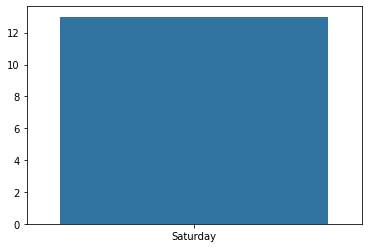

dict_keys(['sentiment_positiveness', 'sentiment_negativeness', 'sentiment_neutralness', 'overall_sentiment'])


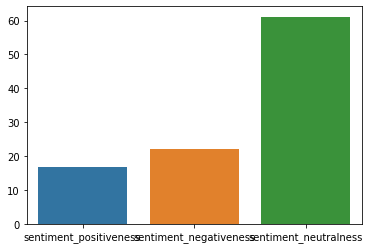

'NEUTRAL'

In [ ]:
hashtag = "CharsiCanadianKumar"
useranalytics = UserAnalytics(da['2532878335'])
recent_tweets = useranalytics.user_latest_tweets_on_ht(hashtag)

print (recent_tweets)
statistics_ = useranalytics.user_followers_following_statistics()
print (statistics_)
avg_tweets_seconds,tweets_datetime_list = useranalytics.avg_tweets_month_on_ht(hashtag)
avg_datetime_to_tweet = useranalytics.seconds_ymwdhms(avg_tweets_seconds)
expected_next_tweet = useranalytics.expected_next_tweet(tweets_datetime_list[0],int(avg_tweets_seconds))
print (avg_datetime_to_tweet)
print (expected_next_tweet)
print (tweets_datetime_list)
user_favorite_weekday,weekdays_count_dict = useranalytics.favorite_week(tweets_datetime_list)
print (user_favorite_weekday)
print (weekdays_count_dict)
sentiment_score_list = useranalytics.tweets_sentiment_score(recent_tweets)
print (sentiment_score_list)
sentiment_percentage_dict = useranalytics.sentiment_percentage(sentiment_score_list)
print (sentiment_percentage_dict)
frequent_words,total_words = useranalytics.frequently_used_words(recent_tweets)
print (frequent_words)
print (useranalytics.high_sentiment_words(total_words))
tweets_week_graph = useranalytics.bar_graph(weekdays_count_dict,'Weekdays Vs Tweets','weeks','Tweets')
removed = useranalytics.remove_dict_element(sentiment_percentage_dict,'overall_sentiment')
# useranalytics.remove_dict_element(sentiment_percentage_dict,'overall_sentiment')
tweets_sentiment_graph = useranalytics.bar_graph(removed,'overal sentiment percentage','sentiment label','sentiment percentage')
useranalytics.user_sentiment_label(removed)

In [ ]:
ua = UserAnalytics(da['1001817386582970370'])
da['1001817386582970370']['tweets'][0]['text']

KeyError: ignored

In [ ]:
ua.user_latest_tweets()

NameError: ignored

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# import tweepy
#  #assign the values accordingly
# consumer_key = "Omf4WnVfRQgFSuuMjLY7uL6JE"
# consumer_secret = "Cd0mp2eMjFtKOwotJN8LWHJ89uuryuHCzEsZY5uNvo7pZwHBPq"
# access_token = "1860631490-yskmN9ypLpokkWPxzr30P0Nb5TNN1c0K8YwG10y"
# access_token_secret = "3F0mwpqQyM0hubHhk94wwN5xvTwQGjg1eMGvBYGlWPb7S"

# # authorization of consumer key and consumer secret
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# # set access to user's access key and access secret
# auth.set_access_token(access_token, access_token_secret)

# # calling the api
# api = tweepy.API(auth)

# user = api.get_user('1062505877268127744')
# time_line = user.timeline()
# for single_tweet in time_line:


# 	# print ">>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<"
#     print ("ID:", single_tweet.id)
#     print ("User ID:", single_tweet.user.id)
#     print ("Text:", single_tweet.text)

#     print ("Created:", single_tweet.created_at)
#     print ("Contributors:", single_tweet.contributors)
#     print ("Favorited:", single_tweet.favorited)
#     print ("In reply to screen name:", single_tweet.in_reply_to_screen_name)
#     print ("In reply to status ID:", single_tweet.in_reply_to_status_id)
#     print ("In reply to status ID str:", single_tweet.in_reply_to_status_id_str)
#     print ("In reply to user ID:", single_tweet.in_reply_to_user_id)
#     print ("In reply to user ID str:", single_tweet.in_reply_to_user_id_str)
#     print ("Place:", single_tweet.place)
#     print ("Retweeted:", single_tweet.retweeted)
#     print ("Retweet count:", single_tweet.retweet_count)
#     print ("Source:", single_tweet.source)
#     print ("Truncated:", single_tweet.truncated)
